In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from Clean import *

In [2]:
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

In [3]:
RUOA = "../../Datasets/"
DOWNTOWN = "../AltenativeDatasets/Datasets/"

In [4]:
df_ruoa = pd.read_csv(RUOA + "Day.csv")
df_downtown = pd.read_csv(DOWNTOWN + "CompleteDataset.csv")

In [5]:
df_ruoa["Time"] = pd.to_datetime(df_ruoa["Time"])
df_downtown["Fecha"] = pd.to_datetime(df_downtown["Fecha"])

In [6]:
print(f"RUOA: {df_ruoa.Time.min()}, {df_ruoa.Time.max()}")

RUOA: 2015-08-01 00:00:00, 2025-01-27 00:00:00


In [7]:
df_downtown = df_downtown.rename({"Fecha":"Time", 
                    "Temperatura": "TemperatureDowntown",
                    "RelativeHumidity": "RelativeHumidityDowntown",
                    "SolarRadiation": "SolarRadiationDowntown",
                    "Rainfall":"RainfallDowntown",
                    "WindDirection": "WindDirectionDowntown",
                    "PM10": "PM10Downtown",
                    "PM2.5": "PM2.5Downtown",
                    "O3": "O3Downtown",
                    "CO": "CODowntown",
                    "NO": "NODowntown",
                    "NO2": "NO2Downtown",
                    "SO2": "SO2Downtown",
                    }, axis=1)

In [8]:
df_downtown.columns

Index(['Time', 'TemperatureDowntown', 'RelativeHumidityDowntown',
       'SolarRadiationDowntown', 'RainfallDowntown', 'WindDirectionDowntown',
       'PM10Downtown', 'PM2.5Downtown', 'O3Downtown', 'CODowntown',
       'NODowntown', 'NO2Downtown', 'SO2Downtown'],
      dtype='object')

In [9]:
df_merge = pd.merge(df_ruoa, df_downtown, how="outer", on=["Time", "Time"]).drop_duplicates()
df_merge

,Time,O3_flag,SO2_flag,NO2_flag,NO_flag,CO_flag,PM10_flag,PM2.5_flag,WDir_Avg,Rain_Tot,WDir_SD,O3,SO2,NO2,NO,CO,PM10,PM2.5,Temp_Avg,RH_Avg,WSpeed_Avg,WSpeed_Max,Press_Avg,Rad_Avg,TemperatureDowntown,RelativeHumidityDowntown,SolarRadiationDowntown,RainfallDowntown,WindDirectionDowntown,PM10Downtown,PM2.5Downtown,O3Downtown,CODowntown,NODowntown,NO2Downtown,SO2Downtown
0,2015-08-01,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-08-02,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-08-03,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-08-04,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-08-05,OS,OS,OS,OS,OS,OS,OS,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3504,2025-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.816667,31.000000,0.0,0.0,194.0,-14.0,21.625000,0.0,NaN,0.0,0.0,0.0
3505,2025-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.087500,29.666667,0.0,0.0,223.0,-14.0,19.250000,0.0,NaN,0.0,0.0,0.0
3506,2025-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.862500,31.500000,0.0,0.0,209.0,-14.0,18.250000,0.0,NaN,0.0,0.0,0.0
3507,2025-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.237500,33.458333,0.0,0.0,145.0,-14.0,20.833333,0.0,NaN,0.0,0.0,0.0


In [10]:
print(f"RUOA: {df_merge.Time.min()}, {df_merge.Time.max()}")

RUOA: 2015-08-01 00:00:00, 2025-03-09 00:00:00


## Temperature

In [14]:
df_merge[["Temp_Avg", "TemperatureDowntown"]].describe()

,Temp_Avg,TemperatureDowntown
count,3242.000000,2341.000000
mean,17.600482,19.527246
std,2.691010,2.495301
min,7.102895,8.590000
25%,15.833456,18.104167
50%,17.731101,19.545833
75%,19.252424,21.066667
max,32.322439,26.829167


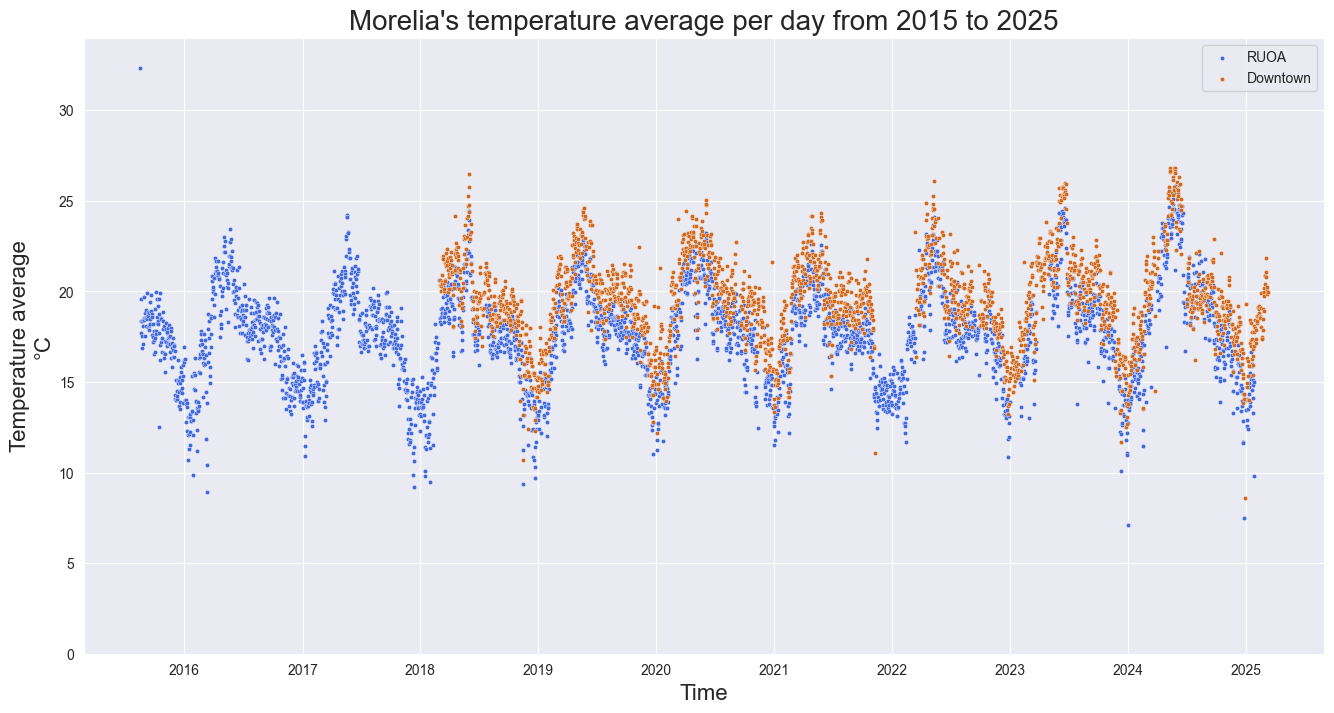

In [17]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["Temp_Avg"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["TemperatureDowntown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 34)
plt.ylabel("Temperature average\n°C", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's temperature average per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

## Rainfall

In [18]:
df_merge["Rain_Tot"] = df_merge["Rain_Tot"].apply(rainfall)

In [19]:
df_merge["RainfallDowntown"] = df_merge["RainfallDowntown"].apply(rainfall)

In [20]:
df_merge[["Rain_Tot", "RainfallDowntown"]].describe()

,Rain_Tot,RainfallDowntown
count,3453.000000,1399.000000
mean,1.959340,84.700071
std,5.383117,165.600423
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.110000
75%,0.600000,1.025000
max,53.900000,431.980000


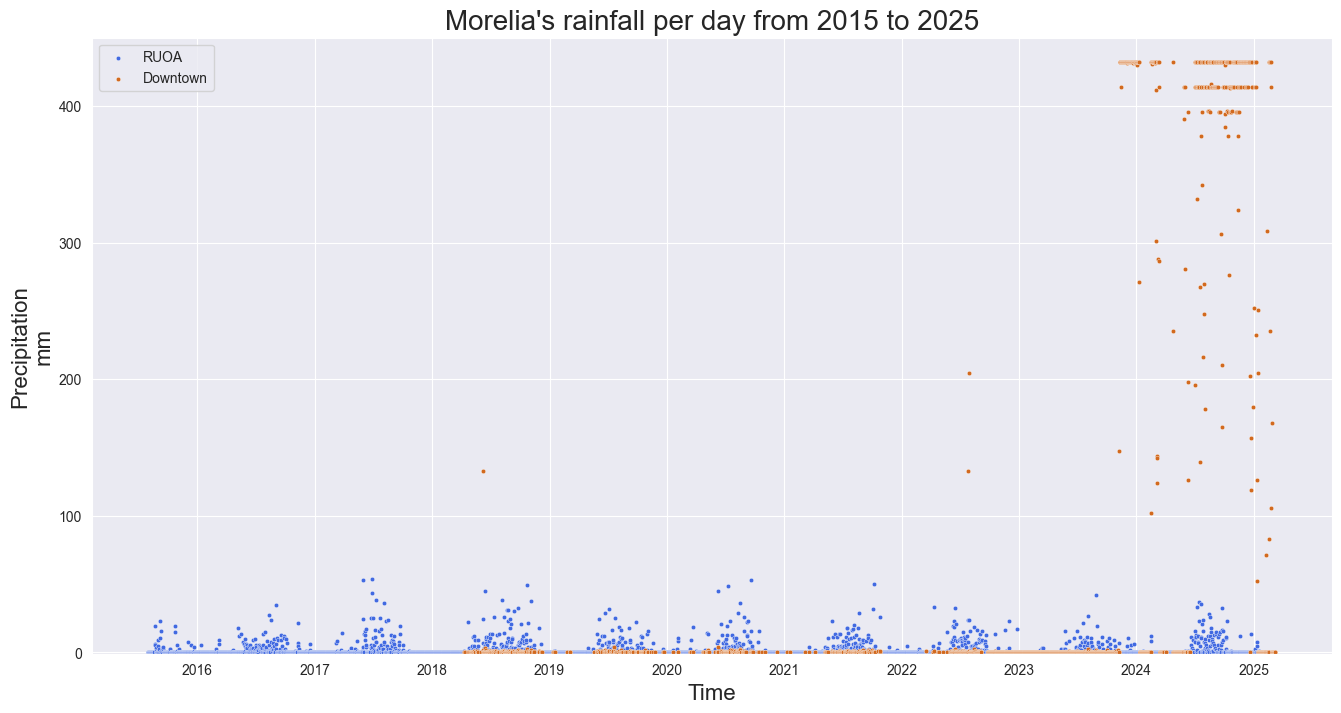

In [23]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["Rain_Tot"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["RainfallDowntown"], s=10, color="chocolate", label="Downtown")
plt.ylim(-1, 450)
plt.ylabel("Precipitation\nmm", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's rainfall per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

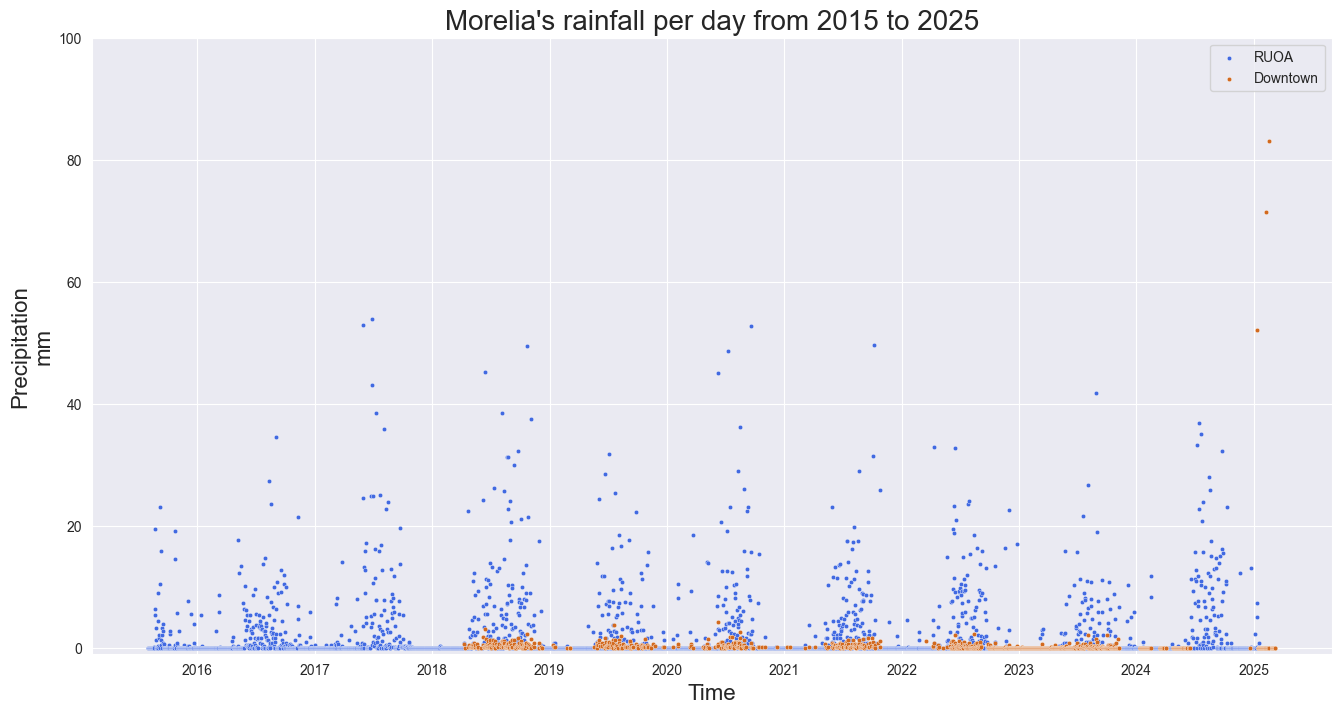

In [24]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["Rain_Tot"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["RainfallDowntown"], s=10, color="chocolate", label="Downtown")
plt.ylim(-1, 100)
plt.ylabel("Precipitation\nmm", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's rainfall per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

## Relative Humidity

In [25]:
df_merge["RH_Avg"] = df_merge["RH_Avg"].apply(relativeHumidity)
df_merge["RelativeHumidityDowntown"] = df_merge["RelativeHumidityDowntown"].apply(relativeHumidity)

In [26]:
df_merge[["RH_Avg", "RelativeHumidityDowntown"]].describe()

,RH_Avg,RelativeHumidityDowntown
count,3265.000000,2341.000000
mean,61.178079,53.747995
std,16.665208,14.508262
min,0.408878,15.416667
25%,49.597813,42.500000
50%,64.785764,56.782609
75%,74.459132,65.541667
max,98.498681,88.375000


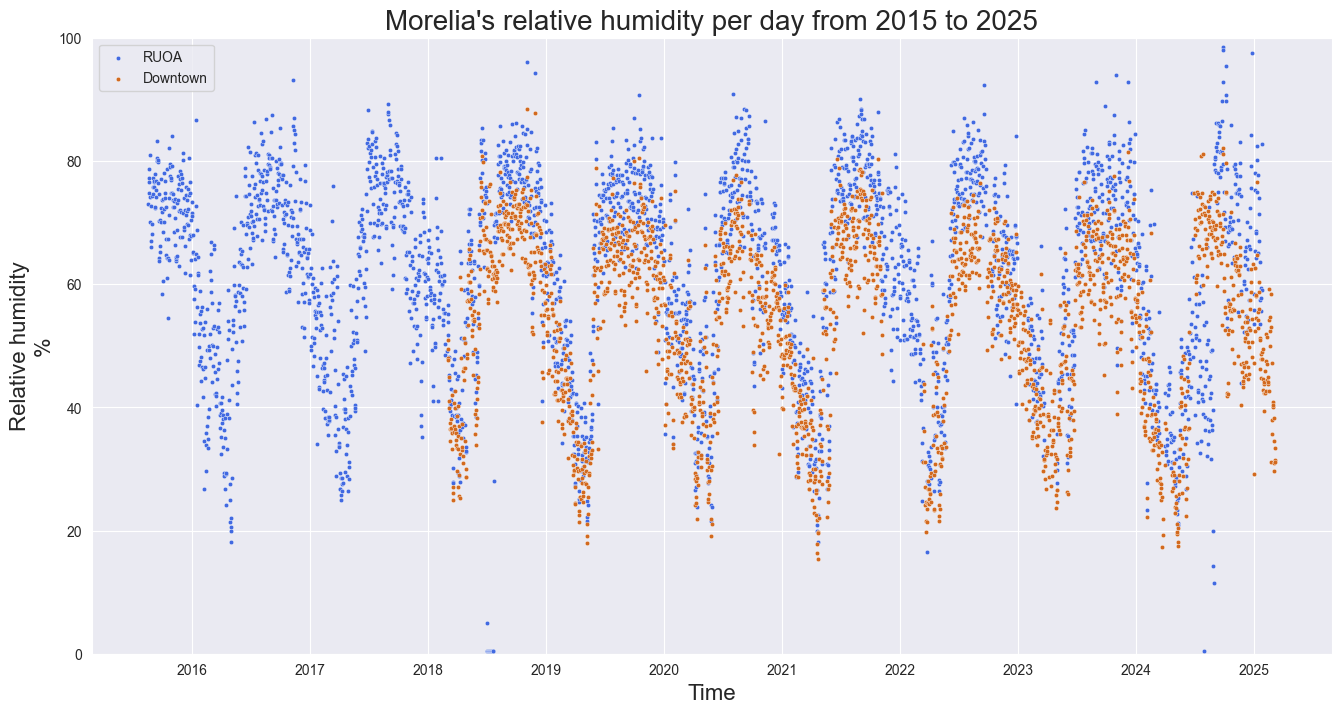

In [28]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["RH_Avg"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["RelativeHumidityDowntown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 100)
plt.ylabel("Relative humidity\n%", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's relative humidity per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

## Solar Radiation

In [29]:
df_merge["Rad_Avg"] = df_merge["Rad_Avg"].apply(radiation)
df_merge["SolarRadiationDowntown"] = df_merge["SolarRadiationDowntown"].apply(radiation)

In [30]:
df_merge[["Rad_Avg", "SolarRadiationDowntown"]].describe()

,Rad_Avg,SolarRadiationDowntown
count,3247.000000,2065.000000
mean,241.836719,339.884366
std,60.127395,134.604639
min,20.993886,0.083333
25%,205.839833,232.083333
50%,242.604656,306.625000
75%,285.502256,458.500000
max,555.670708,652.000000


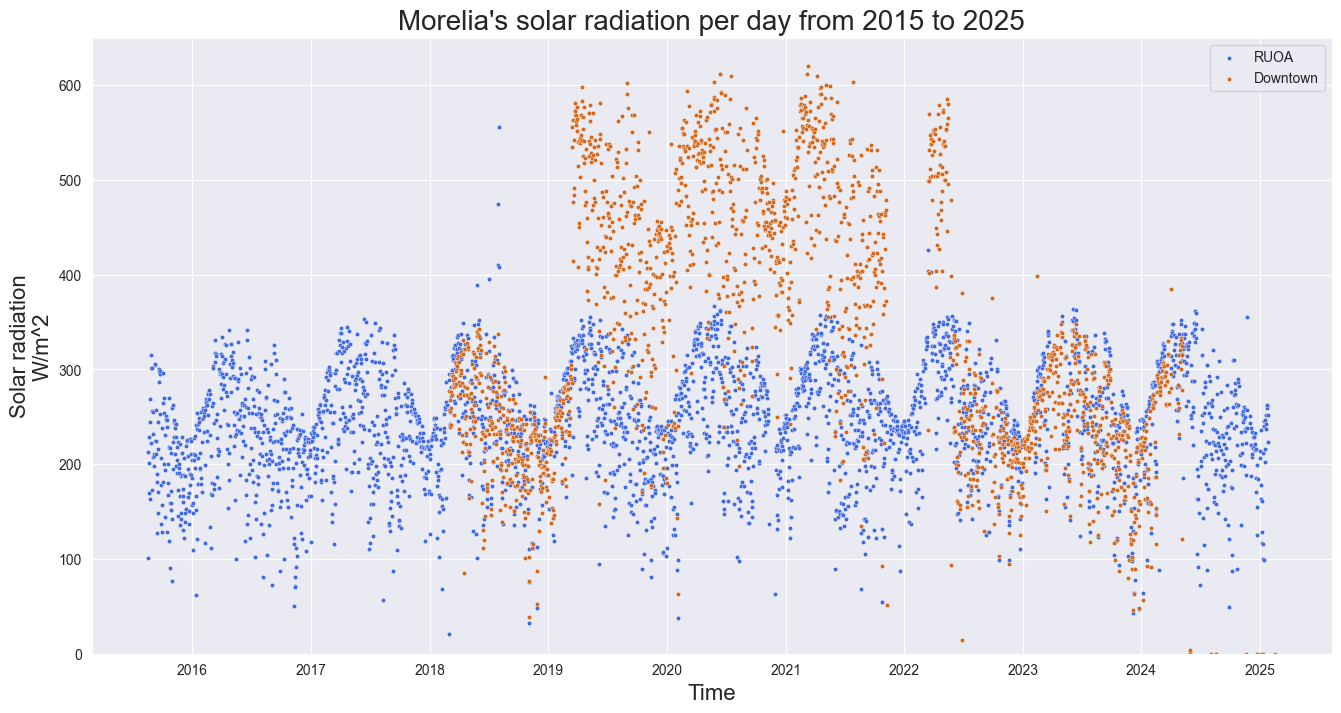

In [32]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["Rad_Avg"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["SolarRadiationDowntown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 650)
plt.ylabel("Solar radiation\nW/m^2", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's solar radiation per day from 2015 to 2025", size=20)
plt.legend()
plt.show()

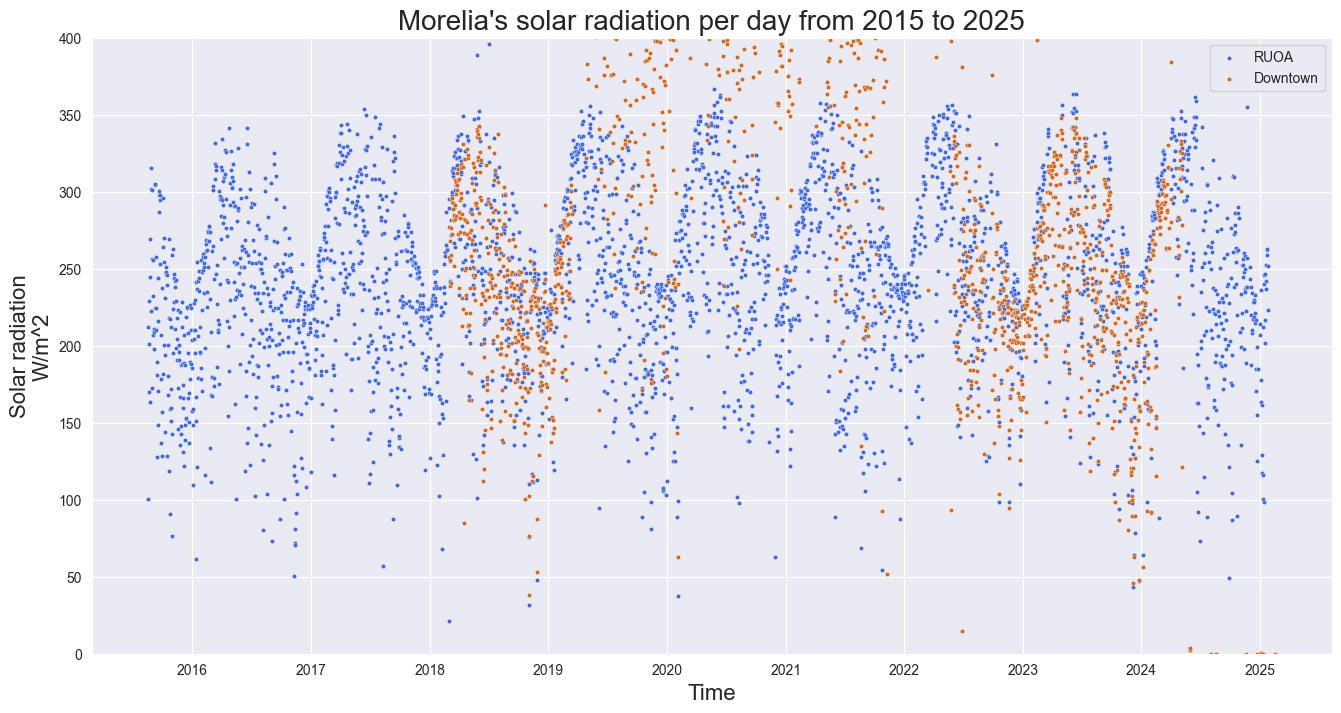

In [33]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=df_merge["Time"], y=df_merge["Rad_Avg"], s=10, color="royalblue", label="RUOA")
sns.scatterplot(x=df_merge["Time"], y=df_merge["SolarRadiationDowntown"], s=10, color="chocolate", label="Downtown")
plt.ylim(0, 400)
plt.ylabel("Solar radiation\nW/m^2", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's solar radiation per day from 2015 to 2025", size=20)
plt.legend()
plt.show()